# nii - Exploratory Data Analysis 

The features present in the dataset are:

    1. Petal length     - Cánh hoa 
    2. Petal Width       
    3. Sepal Length     - Đài hoa 
    4. Sepal Width  

The target '*species*' has 3 classes namely:

    1. setosa
    2. versicolor
    3. virginica      


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## **Load the dataset**

In [5]:
df = sns.load_dataset('iris')

## **Take a look & non-graphical EDA**

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- More details: the types of variables 

In [ ]:
df.info()   # Show the summary of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Check the null/nan values

In [ ]:
df.isnull()     # Return a table of 'boolean' values of null/nan elements

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
# Count numbers of null/nan values of each columns
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Show the general stats of the variables**

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Are the classes (species) balanced?

In [12]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

&rarr; It balances: 50

### Correlation Between Variables

In [13]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


&rarr; sepal_length  &harr; petal_length/width

&rarr; petal_length &harr; petal_width 


## **Graphical EDA**

### Are the classes (species) balanced?

In [32]:
species_count = df["species"].value_counts()

- Using pandas

species_count name:  count
First species count:  50
First species count:  50
Type of species_count:  <class 'pandas.core.series.Series'>


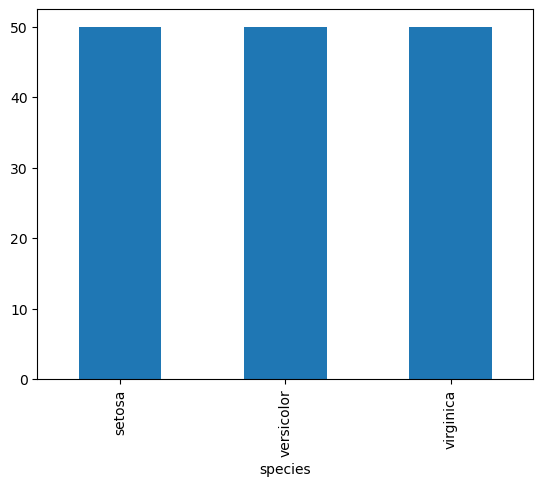

In [49]:
print("species_count name: ", species_count.name)
print("First species count: ", species_count.iloc[0])
print("First species count: ", species_count.loc['setosa'])
print("Type of species_count: ", type(species_count))      # pandas: Series

species_count.plot.bar();

- Using matplotlib

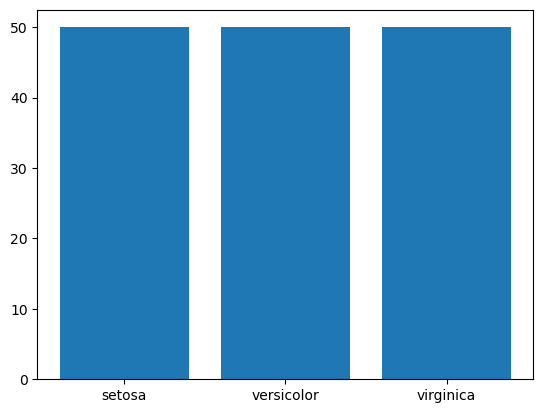

In [48]:
# plt.bar(x, heights)
plt.bar(species_count.index, species_count.values);

- Using hist: show the frequency of values(species)

Text(0.5, 0, 'Species')

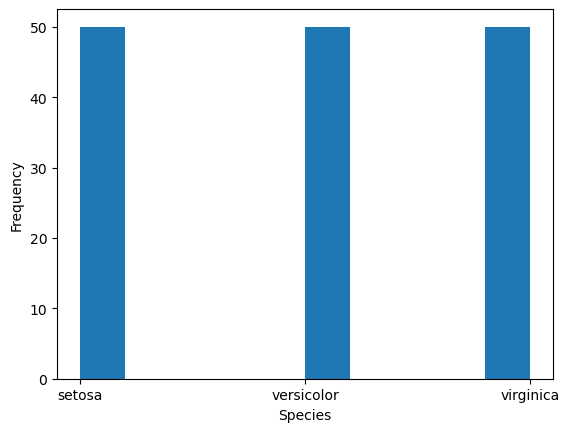

In [45]:
plt.hist(df['species'])
plt.ylabel('Frequency')
plt.xlabel('Species')

- Using seaborn

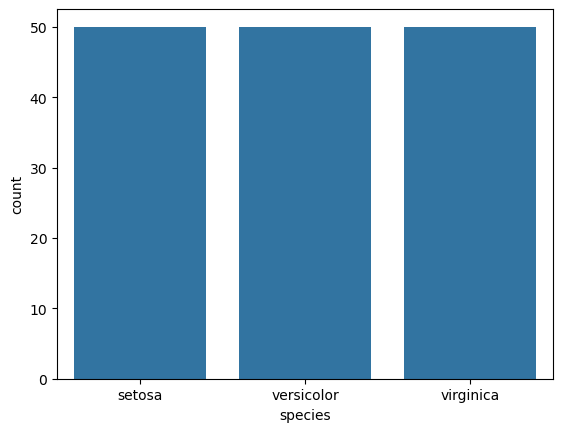

In [ ]:
# The ';' is used to suppress the OUTPUT of the LAST LINE in a Jupyter notebook cell
sns.countplot(x = df['species']);

### We can conclude that: 

- Classes are balanced

## **Comparison graphs**

### Scatterplots

#### What?

- use a Cartesian coordinates system to display values of typically two variables for a set of data

#### Why?

- show the relationship between two variables

Let's try an example:

Draw a scatter plot between 2 features: *petal_length* &harr; *petal_width* 

#### Scatter plot using pandas

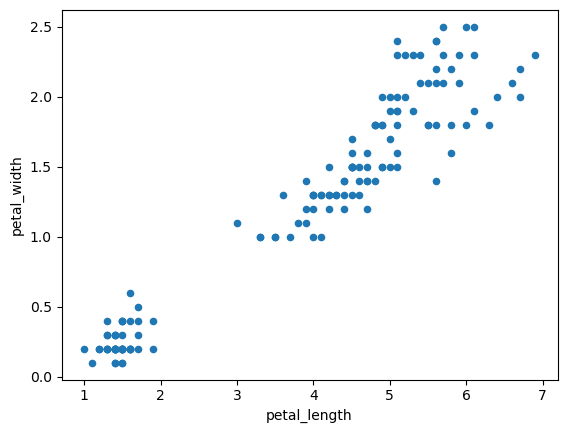

In [59]:
df.plot.scatter('petal_length', 'petal_width');

#### Scatter plot using matplotlib

- Another one: *sepal_length* &harr; *sepal_width*

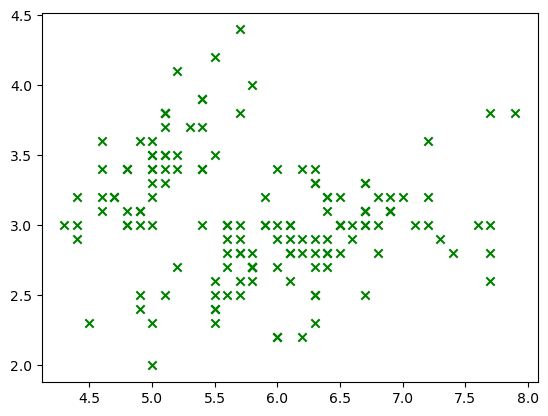

In [58]:
# plt.scatter('sepal_length', 'sepal_width', data=df)
# plt.scatter(df['sepal_length'], df['sepal_width'], c='green')
plt.scatter(df['sepal_length'], df['sepal_width'], marker='x' ,c='green');


#### Scatter plot using seaborn

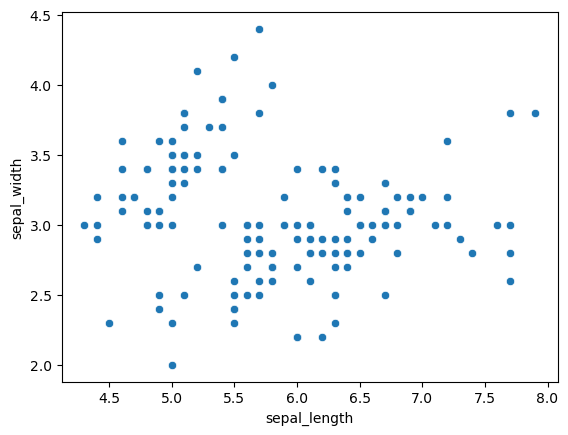

In [61]:
sns.scatterplot(x = df['sepal_length'], y = df['sepal_width']);

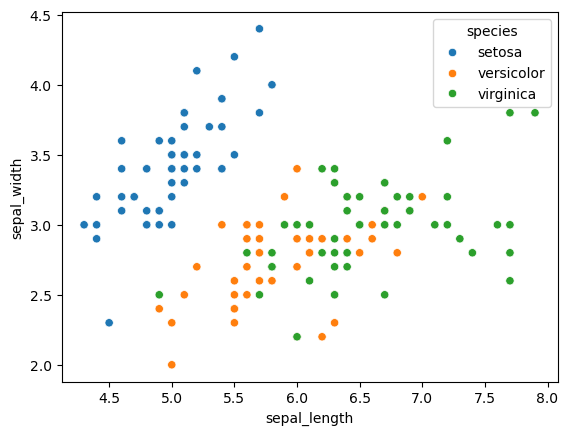

In [ ]:
# With respect to the target classes (species)
# hue: different colors for different species
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue=df['species'], data=df);

### We can conclude: 

- the i.setosa species have small sepal length >< higher width
- Virginica has larger sepal lengths and smaller sepal widths.
- Versicolor: in almost middle

## **Correlogram**

- Correlogram: AKS correlation matrix for analyze the relationship between each pair of numeric variables

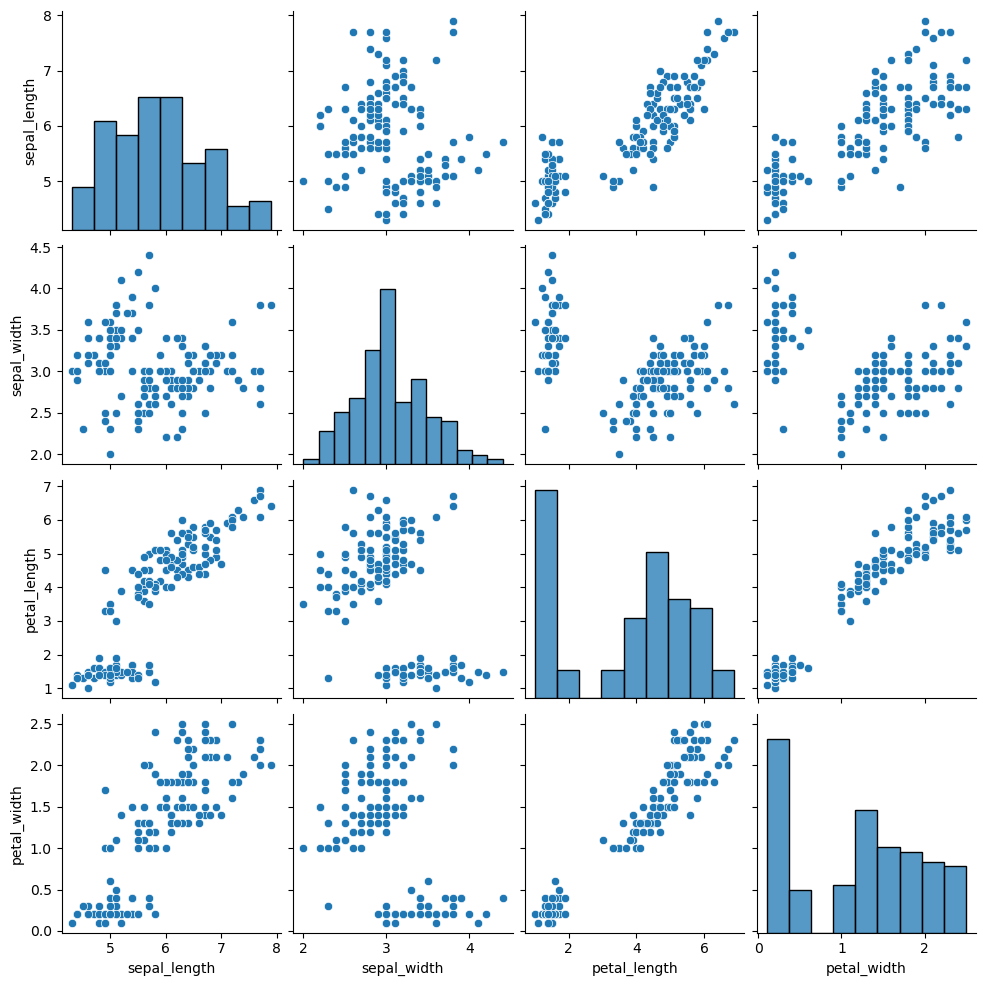

In [66]:
sns.pairplot(df);

- And with different color:

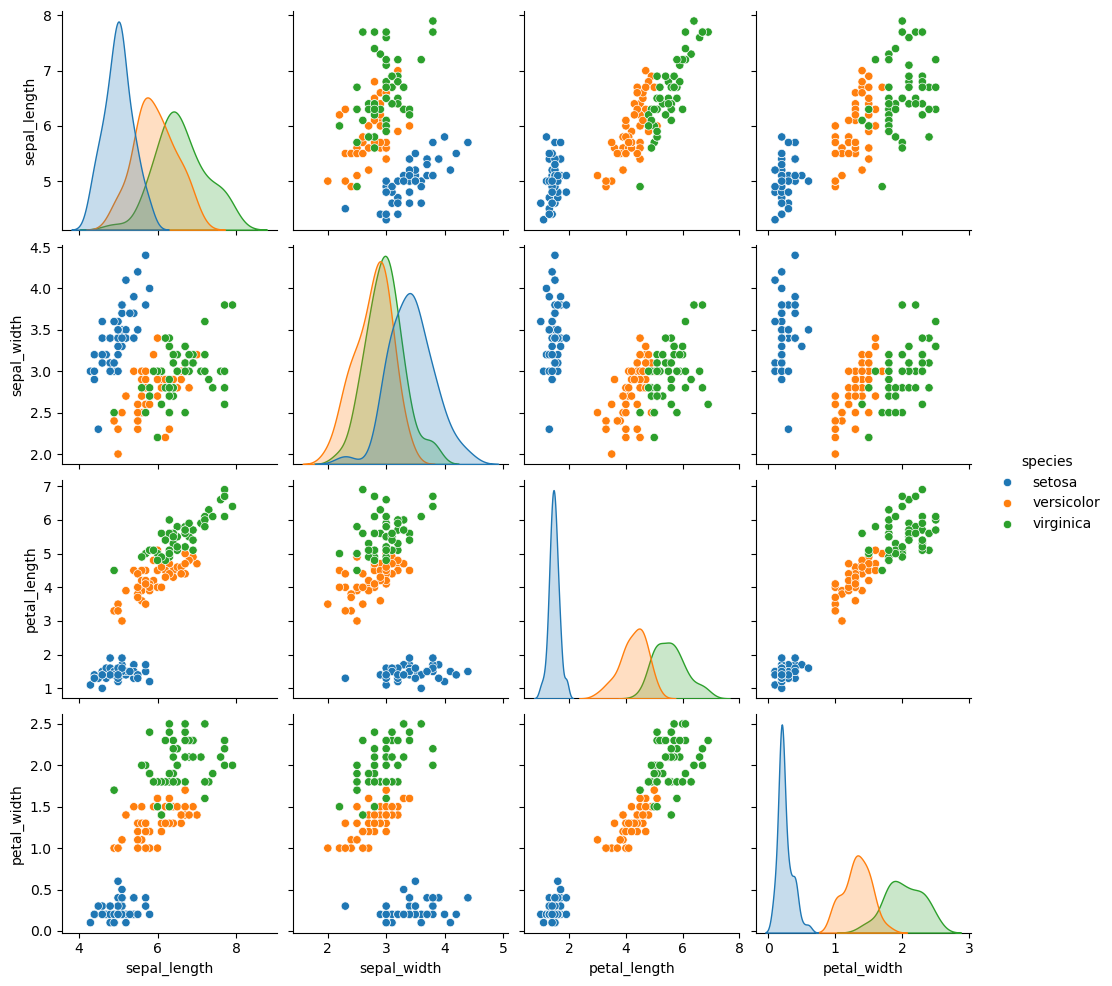

In [67]:
sns.pairplot(df, hue='species');

### In summarize: 

- *Setosa* has a large difference in its characteristics when compare to other species
- *Virginica*  mostly has large petal or sepal lengths.
- *Versicolor* has average petal length and petal width


## **Heatmap**

- Another way to visualize this correlation

*Heatmap*: a 2D graphical representation of data where the individual values that are contained in matrix are represented as colors &rarr; useful to see which intersections of the categorical values, have higher concentration of the data compared to the others

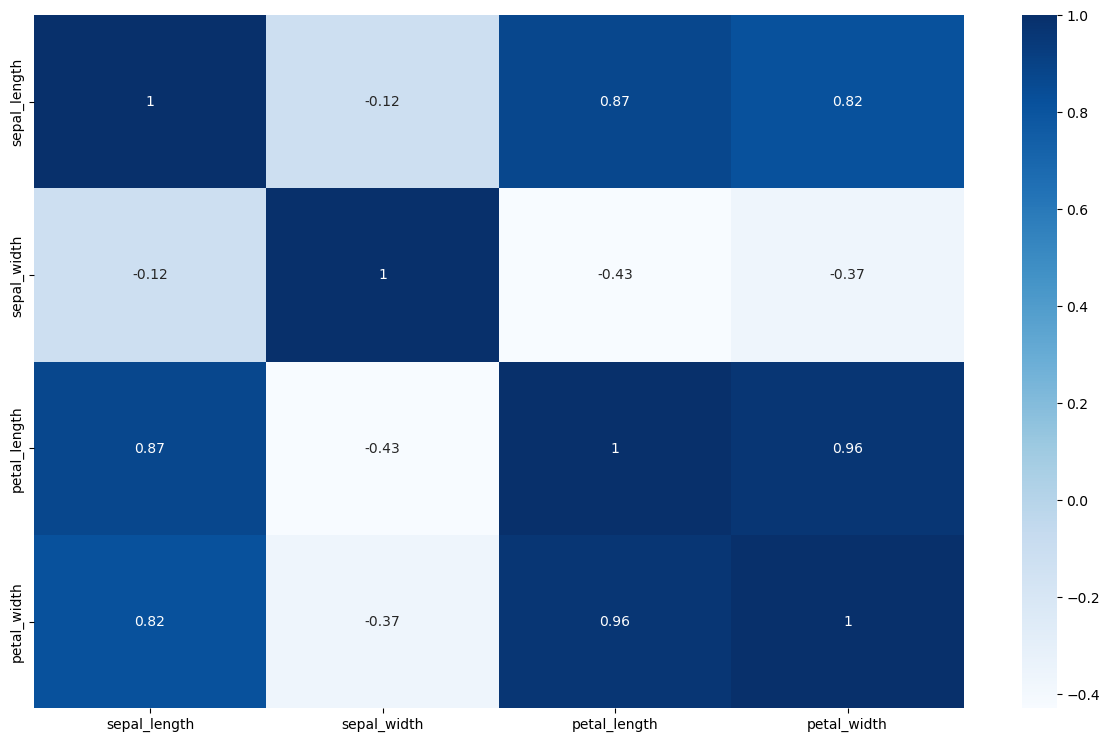

In [76]:
fig = plt.figure(figsize=(15, 9))
# Try to find the correlation in all column -> the species lead to ERROR
# sns.heatmap(df.corr(), cmap="Blues", annot=True);

# Only find the correlation on the numeric column only
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True);

&rarr; petal_length & petal_width have a high correlation 

&rarr; petal_length & sepal_length have good correlation, as well as petal_width & sepal_length 

#### Histogram s and distributions 

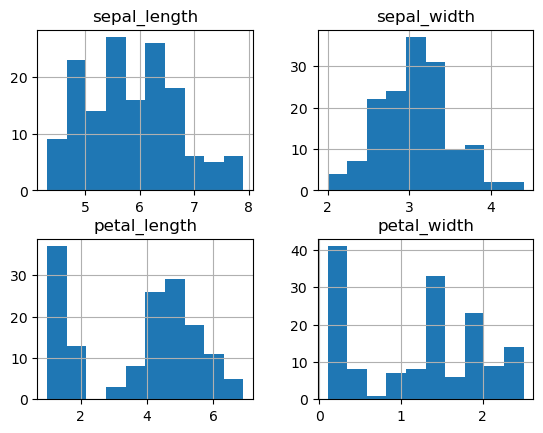

In [77]:
df.hist();

#### Boxplots 

<figure>
    <div align="center">
        <img src="./boxplot_explaination.png">
    </div>

</figure>

+ Purpose: summarize data distribution into 5 figure:
    - Min:      the minimum value (except outliers)
    - Q1:       (quartile 1)    - 25%
    - Median:   the median      - 50%
    - Q3:       (quartile 3)    - 75%
    - Max:      the maximum value (except outliers)

&rarr; Is the data skewed left/right (see the median)?<br>
&rarr; Dispersion of data (length of whisker|box)<br>
&rarr; The outliers <br>

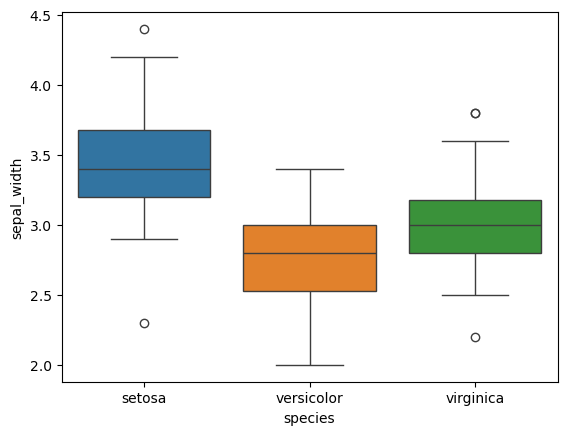

In [88]:
sns.boxplot(x = 'species', y = 'sepal_width', hue='species', data=df);

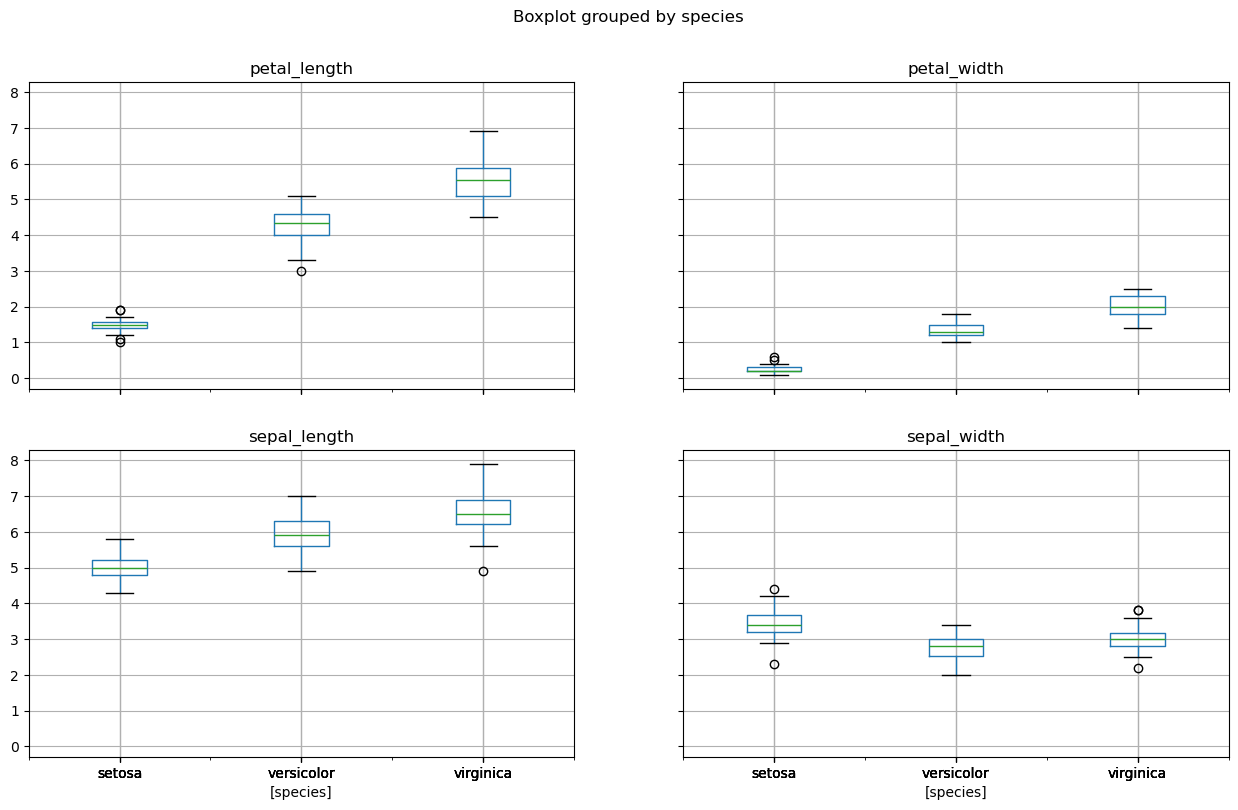

In [82]:
df.boxplot(by='species', figsize=(15, 9));

#### Violins

- Combine boxplot & density plot 
    + Left/Right: density probability line (using KDE - Kernel Density Estimation)

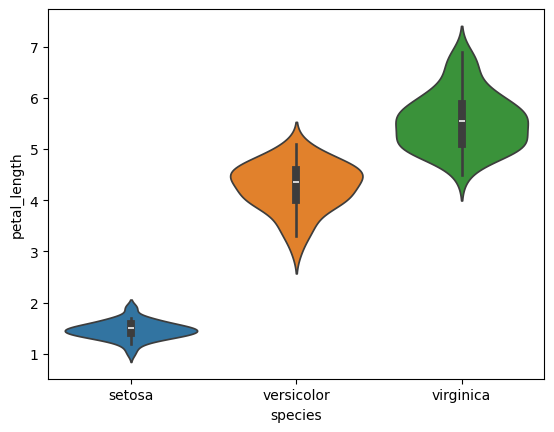

In [87]:
sns.violinplot(x = 'species', y = 'petal_length', hue='species', data=df);

### The end